In [1]:
##############################################################################
#
# This code is part of the publication:
# https://www.biorxiv.org/content/10.1101/2020.11.30.403840v1
#
# The generation of cortical novelty responses through inhibitory plasticity
# Auguste Schulz*, Christoph Miehl*, Michael J. Berry II, Julijana Gjorgjieva
#
# * equal contribution
#
##############################################################################

# Figure_odball_disinhibition

specify the filename below 

In [1]:
from IPython.display import HTML, IFrame, Image

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os, fnmatch
import time
import h5py
from scipy.signal import find_peaks, peak_prominences
from scipy import stats
from scipy import optimize
from scipy.signal import decimate
from scipy import signal
import gc
import time

%matplotlib inline


from matplotlib import rcParams, cm
rcParams['grid.linewidth'] = 0
rcParams['pdf.fonttype'] = 42
# import custom functions
from helper_functions import *
import helper_functions

#reload(helper_functions)
from helper_functions import *

from evaluation_functions import *
import evaluation_functions

#reload(evaluation_functions)
from evaluation_functions import *

In [2]:
def cm2inch(*tupl):
    inch = 2.54
    if isinstance(tupl[0], tuple):
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)
def count(list1, l, r): 
    c = 0
    # traverse in the list1 
    for x in list1: 
        # condition check 
        if x>= l and x<= r: 
            c+= 1
    return c 

def get_time_idx(time, onsets):
    idx = []
    for tt in onsets:
        #print(tt)
        #print(min(min(np.where(tt<=time))))
        idx.append(min(min(np.where(time>=tt))))
        
    return idx

figsize_cm = (20,10)
figsize_inch = cm2inch(figsize_cm)
figsize_inch

(7.874015748031496, 3.937007874015748)

In [3]:
file_names = [
    # disinhibition modelled
    "Oddball_200_disinhib_true_SUB_1.5_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-12-16-14-10-50repeatedsequences.h5"
]

In [4]:
E_all  = []
E_all_nov  = []

I_all = []
ed_all = []
FIG_DIR_ALL = []
Xweight_all = []
Xweightinhib_all = []

ItoAweight_all = []
timevector_all = []
avgweightEmem_all = []
avgweightImem_all = []
avgweightEnov_all = []
avgweightImem_all = []
avgwindow = 8
timestr = time.strftime("%Y-%m-%d-%H-%M-%S")

ws = False
laptop = False
#ffm = False
if ws:
    RUN_DIR = "/home/auguste/novelty/data/"
    RESULTS_DIR = "/home/auguste/novelty/results/"
elif laptop:
    RUN_DIR = "/home/auguste/gjor/data/"
    RESULTS_DIR = "/home/auguste/gjor/results/"
else:
    RUN_DIR = "../data/"
    RESULTS_DIR = "../results/"

FILE_NAME_RUN = [RUN_DIR + file_name for file_name in file_names]
#file_name_run = run_folder + file_name
# open file
frun = h5py.File(FILE_NAME_RUN[0], "r")

FILE_NAME_RUN[-1]
dict_dursimspikes_last  = frun["dursimspikes"]
dict_dursimspikes_keys = dict_dursimspikes_last.keys()
dict_dursimspikes_keys;
adjustfact  = frun["params"]['adjustfactorinhib2'].value
stimulus  = frun["initial"]['stimulus'].value
ptretrain  = frun["initial"]['lengthpretrain'].value

print(stimulus[:,-1])
print(stimulus[2,ptretrain])
dict_dursimspikes_last= frun["dursimspikes"].keys()
dict_dursimspikes_last;
print(frun["initial"].keys())

[1.00e+00 2.68e+04 2.71e+04 1.20e+01]
4300.0
<KeysViewHDF5 ['assemblymembers', 'idxblockonset', 'inhibassemblies', 'lengthpretrain', 'seqnumber', 'stimparams', 'stimparams_prestim', 'stimulus']>


/home/auguste/Software/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [5]:
for i,fn in enumerate(file_names):
    print(fn)
    
    E,I, ed, E_hist, E_hist_boxcar, FIG_DIR, E_nov = analyse_filename(fn, avgwindow=avgwindow, timestr=timestr, RUN_DIR = RUN_DIR, RESULTS_DIR=RESULTS_DIR)

spiketimes = 0
gc.collect()

Nseq = 1

Oddball_200_disinhib_true_SUB_1.5_inhibtunning_0.1_ifAAnotAB_false__dur28000.0msNblocks1Ntrain0lenstim300lenpause900Nreps20strength12wadaptfalseiSTDPtrueRateAdjust1Time2020-12-16-14-10-50repeatedsequences.h5
NON ADAPTIVE


Text(0.5, 0, 'time locked to onset [s]')

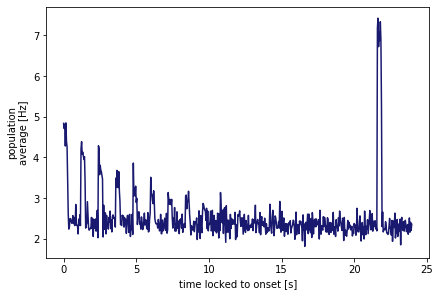

In [6]:
plt.figure(constrained_layout=True)
plt.plot(ed[:-1], E[0][:-1], color = 'midnightblue')
plt.ylabel("population\naverage [Hz]")
plt.xlabel("time locked to onset [s]")